In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np
import math
# DecisionTreeClassifier,
# SVC, MLPClassifier

In [2]:
cc = pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod12/creditcard.csv")

In [3]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Here im checking and noting which features ahve the largest correlations 
# V17, V14, V12, V10. V16, V3, V7, V4, V11

cc.corr().sort_values(by=['Class'])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V17,-0.073297,-5.011524e-16,-9.883008e-16,4.576619e-17,-4.397925e-16,1.425729e-16,3.567582e-16,1.149692e-15,-3.508777e-16,6.535992e-16,...,-7.753967e-16,-8.389703e-16,5.367784e-16,-5.543631e-17,4.822068e-16,4.870302e-16,8.844373e-16,-2.182692e-16,0.007309,-0.326481
V14,-0.098757,9.352582e-16,-2.541036e-16,4.271336e-16,-8.522435e-17,-3.634803e-16,3.452801e-16,-1.729462e-16,-1.131098e-16,2.343317e-16,...,1.634141e-17,3.439699e-16,7.620728e-17,2.335749e-16,-2.606783e-16,-6.580254e-18,1.285770e-16,2.503271e-15,0.033751,-0.302544
V12,0.124348,2.422086e-16,-6.588252e-16,2.206522e-16,-5.657963e-16,3.761033e-16,2.140589e-16,1.510045e-15,-6.266057e-17,-2.445230e-15,...,3.229576e-16,-5.903992e-16,1.392162e-16,4.901644e-16,5.053736e-16,-5.759321e-16,-2.312619e-16,7.327446e-16,-0.009542,-0.260593
V10,0.030617,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,...,8.089504e-16,-6.707598e-16,3.809732e-16,-4.032806e-17,-2.863813e-16,-2.554293e-16,-3.103239e-16,-1.515934e-16,-0.101502,-0.216883
V16,0.011903,6.308789e-16,4.934097e-17,1.183364e-15,-6.939204e-16,-3.517076e-16,-2.477917e-16,2.893672e-16,5.027192e-16,-3.251906e-16,...,-3.927401e-16,3.878384e-17,8.519670e-16,-4.289239e-16,-6.644104e-16,-5.186503e-16,7.820038e-16,8.637186e-16,-0.003910,-0.196539
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V18,0.090438,2.870125e-16,2.636654e-16,5.427965e-16,1.493667e-16,1.109525e-15,2.811474e-16,-1.116789e-16,-4.093852e-16,1.203843e-16,...,-1.140973e-15,-8.662635e-17,-3.624236e-16,-1.126043e-16,-2.310856e-16,3.183964e-16,2.435170e-16,8.844995e-16,0.035650,-0.111485
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


# Problem 1
**[10 pts] Pre-process the dataset, apply normalization or standardization, list number of
rows and columns, check sanity.**  
My choice is to simply preprocess the data by downselecting a subset of feature by correlation value (9 largest values). I chose not to normalize or standarized the data per class office hours 



In [23]:
# Here im checking and noting which features ahve the largest correlations 
# V17, V14, V12, V10. V16, V3, V7, V4, V11

# I accidently rerun this cell before it was to be handed in. All cells below are still correct and unedited. Run time prevents me from giving a clean copy at this late hour!!

cc.corr().sort_values(by=['Class'])

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
V17,4.576619e-17,-4.397925e-16,1.149692e-15,3.674182e-15,8.719713e-16,-9.869814e-16,4.626140e-15,1.854297e-15,1.000000e+00,-0.326481
V14,4.271336e-16,-8.522435e-17,-1.729462e-16,2.622513e-16,3.637160e-17,1.761652e-16,1.000000e+00,7.910367e-17,4.626140e-15,-0.302544
V12,2.206522e-16,-5.657963e-16,1.510045e-15,1.439907e-15,3.176029e-15,1.000000e+00,1.761652e-16,3.530418e-16,-9.869814e-16,-0.260593
V10,6.289267e-16,6.055490e-16,3.043333e-17,1.000000e+00,2.624448e-16,1.439907e-15,2.622513e-16,-1.705923e-15,3.674182e-15,-0.216883
V16,1.183364e-15,-6.939204e-16,2.893672e-16,-1.705923e-15,-6.173867e-16,3.530418e-16,7.910367e-17,1.000000e+00,1.854297e-15,-0.196539
V3,1.000000e+00,-3.416910e-16,2.168574e-15,6.289267e-16,-5.501758e-17,2.206522e-16,4.271336e-16,1.183364e-15,4.576619e-17,-0.192961
V7,2.168574e-15,1.556330e-16,1.000000e+00,3.043333e-17,-1.084105e-15,1.510045e-15,-1.729462e-16,2.893672e-16,1.149692e-15,-0.187257
V4,-3.416910e-16,1.000000e+00,1.556330e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-8.522435e-17,-6.939204e-16,-4.397925e-16,0.133447
V11,-5.501758e-17,-2.083600e-16,-1.084105e-15,2.624448e-16,1.000000e+00,3.176029e-15,3.637160e-17,-6.173867e-16,8.719713e-16,0.154876
Class,-1.929608e-01,1.334475e-01,-1.872566e-01,-2.168829e-01,1.548756e-01,-2.605929e-01,-3.025437e-01,-1.965389e-01,-3.264811e-01,1.000000


In [8]:
cc.drop(cc.columns.difference(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V4', 'V11', 'Class']), 1, inplace=True)

# 'V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V4', 'V11', 'Class'

cc.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


# Problem 2

**[10 pts] Check the class balance and pick an evaluation metric.**  



In [9]:
# Since there are only 492 dectections of fruad. I will use F1 score due the class imbalance

cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Problem 3
**[20 pts] Split the dataset 50-50 for training and testing. Then run DecisionTreeClassifier,
SVC, MLPClassifier without any tree pruning or regularization. Report your classification
accuracy.**  



In [10]:

X_train, X_test, y_train, y_test = train_test_split(cc.loc[:, cc.columns != 'Class'].values.astype(np.float32), cc.loc[:, cc.columns == 'Class'].values.astype(np.int32).ravel(),test_size=0.50, random_state=42)


In [11]:
# No regression Decision tree
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0)
y_pred_dt= dt.fit(X_train, y_train).predict(X_test)
dtf1= f1_score(y_test,y_pred_dt)

In [12]:
# No regression SVC
s = SVC(random_state=42, C=1000000)
y_pred_svc = s.fit(X_train, y_train).predict(X_test)
svcf1= f1_score(y_test,y_pred_svc)

In [13]:
# No regression MLP
mlp = MLPClassifier(random_state=42,alpha=0)
y_pred_mlp = mlp.fit(X_train, y_train).predict(X_test)
mlpf1= f1_score(y_test,y_pred_mlp)

In [14]:
# Results for no regression 
print(f'DecisionTreeClassifier F1 Score   : {dtf1:.2f}')
print(f'                   SVC F1 Score   : {svcf1:.2f}')
print(f'                   MLP F1 Score   : {mlpf1:.2f}')

DecisionTreeClassifier F1 Score   : 0.76
                   SVC F1 Score   : 0.37
                   MLP F1 Score   : 0.80


# Problem 4
**[20 pts] Run DecisionTreeClassifier, SVC, MLPClassifier with tree pruning and
regularization (Hint: Use GridSearchCV to optimize the regularization parameters). Report
your classification accuracy.**  

In [15]:
#with DecisionTree regression 
dt_r = DecisionTreeClassifier(random_state=42)
parameters_gs = {'ccp_alpha':[0,.01,.02,.05,.1,.2,.5,1,10]}
GS_dt= GridSearchCV(dt_r, parameters_gs, scoring='f1_micro', n_jobs=8)
GS_dt.fit(X_train, y_train)

print(GS_dt.best_estimator_, )
print(f'DecisionTreeClassifier F1 Score   :{f1_score(y_test,GS_dt.best_estimator_.predict(X_test)):.2f}')

DecisionTreeClassifier(ccp_alpha=0, random_state=42)
DecisionTreeClassifier F1 Score   :0.76


In [16]:
#with SVC regression 
svc_r = SVC(random_state=42)
parameters_svc = {'C':[1e-4,2e-3,1e-2,1,2,5,50,200]}

GS_svc= GridSearchCV(svc_r, parameters_svc,scoring='f1_micro', n_jobs=8)
GS_svc.fit(X_train, y_train)

print(GS_svc.best_estimator_)
print(f'SVC F1 Score   :{f1_score(y_test,GS_svc.best_estimator_.predict(X_test)):.2f}')

SVC(C=5, random_state=42)
SVC F1 Score   :0.79


In [17]:
# with MPL regession 
mlp_r = MLPClassifier(random_state=42)
parameters_mlp = {'alpha':[1e-4,2e-3,5e-2,1e-1,1,5,50]}

GS_mlp= GridSearchCV(mlp_r, parameters_mlp,scoring='f1_micro', n_jobs=8)
GS_mlp.fit(X_train, y_train)

print(GS_mlp.best_estimator_)
print(f'MLP F1 Score  :{f1_score(y_test,GS_mlp.best_estimator_.predict(X_test)):.2f}')

MLPClassifier(alpha=0.05, random_state=42)
MLP F1 Score  :0.82


# Problem 5
**[20 pts] Attempt avoiding overfitting while the training is reduced. Add splits 40-60, 30-70,
20-80, 10-90, 5-95 and repeat step 3 and step 4.**  


In [19]:
trainingSplit = [.50, .60, .70, .80, .90, .95]
nonRegDecisionTree =[]
nonRegSVC= []
nonRegMLP=[]
RegDecisionTree=[]
RegSVC=[]
RegMLP=[]

for i in trainingSplit:
    X_train1, X_test1, y_train1, y_test1 = train_test_split(cc.loc[:, cc.columns != 'Class'].values.astype(np.float32), cc.loc[:, cc.columns == 'Class'].values.astype(np.int32).ravel(),test_size=i, random_state=42)
    # No regression Decision tree
    dt1 = DecisionTreeClassifier(random_state=42, ccp_alpha=0)
    y_pred_dt1= dt1.fit(X_train1, y_train1).predict(X_test1)
    nonRegDecisionTree.append([i*100,math.floor(f1_score(y_test1,y_pred_dt1)*100)])
    
    # No regression SVC
    s1 = SVC(random_state=42, C=1000000)
    y_pred_svc1 = s1.fit(X_train1, y_train1).predict(X_test1)
    nonRegSVC.append([i*100,math.floor(f1_score(y_test1,y_pred_svc1)*100)])
    
    # No regression MLP
    mlp1 = MLPClassifier(random_state=42,alpha=0)
    y_pred_mlp1 = mlp1.fit(X_train1, y_train1).predict(X_test1)
    nonRegMLP.append([i*100,math.floor(f1_score(y_test1,y_pred_mlp1)*100)])
    
    #with DecisionTree regression 
    dt_r1 = DecisionTreeClassifier(random_state=42)
    parameters_gs1 = {'ccp_alpha':[0,.01,.05,.1,.2,.5,1,5]}
    GS_dt1= GridSearchCV(dt_r1, parameters_gs1, scoring='f1_micro', n_jobs=8)
    GS_dt1.fit(X_train1, y_train1)
    print(GS_dt1.best_estimator_, )
    RegDecisionTree.append([i*100,math.floor(f1_score(y_test1,GS_dt1.best_estimator_.predict(X_test1))*100)])
    
    #with SVC regression 
    svc_r1 = SVC(random_state=42)
    parameters_svc1 = {'C':[.1,1,2,3.5,5,50]}
    GS_svc1= GridSearchCV(svc_r1, parameters_svc1,scoring='f1_micro', n_jobs=8)
    GS_svc1.fit(X_train1, y_train1)
    print(GS_svc1.best_estimator_)
    RegSVC.append([i*100,math.floor(f1_score(y_test1,GS_svc1.best_estimator_.predict(X_test1))*100)])
    
    # with MPL regession 
    mlp_r1 = MLPClassifier(random_state=42)
    parameters_mlp1 = {'alpha':[1e-4,2e-3,5e-2,1e-1,1,5,50]}
    GS_mlp1= GridSearchCV(mlp_r1, parameters_mlp1,scoring='f1_micro', n_jobs=8)
    GS_mlp1.fit(X_train1, y_train1)
    print(GS_mlp1.best_estimator_)
    RegMLP.append([i*100,math.floor(f1_score(y_test1,GS_mlp1.best_estimator_.predict(X_test1))*100)])

DecisionTreeClassifier(ccp_alpha=0, random_state=42)
SVC(C=5, random_state=42)
MLPClassifier(alpha=0.05, random_state=42)
DecisionTreeClassifier(ccp_alpha=0, random_state=42)
SVC(C=2, random_state=42)
MLPClassifier(alpha=0.05, random_state=42)
DecisionTreeClassifier(ccp_alpha=0, random_state=42)
SVC(C=2, random_state=42)
MLPClassifier(alpha=0.1, random_state=42)
DecisionTreeClassifier(ccp_alpha=0, random_state=42)
SVC(C=3.5, random_state=42)
MLPClassifier(alpha=0.05, random_state=42)
DecisionTreeClassifier(ccp_alpha=0, random_state=42)
SVC(C=2, random_state=42)
MLPClassifier(alpha=0.05, random_state=42)
DecisionTreeClassifier(ccp_alpha=0, random_state=42)
SVC(C=2, random_state=42)
MLPClassifier(random_state=42)


In [20]:
#values from above [testsize, f1 score] 
print(nonRegDecisionTree) 
print(nonRegSVC) 
print(nonRegMLP)
print(RegDecisionTree)
print(RegSVC)
print(RegMLP)

[[50.0, 75], [60.0, 71], [70.0, 75], [80.0, 75], [90.0, 66], [95.0, 59]]
[[50.0, 36], [60.0, 32], [70.0, 30], [80.0, 27], [90.0, 12], [95.0, 35]]
[[50.0, 79], [60.0, 75], [70.0, 81], [80.0, 81], [90.0, 81], [95.0, 64]]
[[50.0, 75], [60.0, 71], [70.0, 75], [80.0, 75], [90.0, 66], [95.0, 59]]
[[50.0, 79], [60.0, 75], [70.0, 72], [80.0, 69], [90.0, 58], [95.0, 37]]
[[50.0, 81], [60.0, 81], [70.0, 81], [80.0, 80], [90.0, 76], [95.0, 64]]


In [21]:
X = np.array([nonRegDecisionTree[i][0] for i in range(6)])
nonRegDecisionTree_Y =np.array([nonRegDecisionTree[i][1] for i in range(6)])
nonRegSVC_Y= np.array([nonRegSVC[i][1] for i in range(6)])
nonRegMLP_Y = np.array([nonRegMLP[i][1] for i in range(6)])
RegDecisionTree_Y = np.array([RegDecisionTree[i][1] for i in range(6)])
RegSVC_Y = np.array([RegSVC[i][1] for i in range(6)])
RegMLP_Y = np.array([RegMLP[i][1] for i in range(6)])

C:\Users\physi\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\physi\Anaconda4\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\physi\Anaconda4\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curre

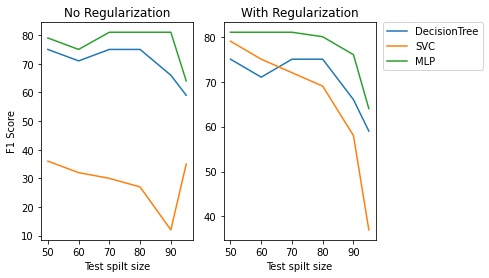

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(121)
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)
ax5 = fig.add_subplot(122)
ax6 = fig.add_subplot(122)
ax1.plot(X,nonRegDecisionTree_Y, label='DecisionTree')
ax2.plot(X,nonRegSVC_Y, label='SVC')
ax3.plot(X,nonRegMLP_Y, label='MLP')
ax4.plot(X,RegDecisionTree_Y, label='DecisionTree')
ax5.plot(X,RegSVC_Y, label='SVC')
ax6.plot(X,RegMLP_Y, label='MLP')
ax1.set_title('No Regularization')

ax1.set_xlabel('Test spilt size')
ax1.set_ylabel('F1 Score')
ax4.set_title('With Regularization')

ax4.set_xlabel('Test spilt size')
# ax4.set_ylabel('F1 Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Problem 6

**[20 pts] Plot everything you have on a single plot and comment about your results in terms
of training size, regularization, etc.**  

In this module we can see how regularization affects the models performance. For SVC, the non-Regularized model performed extremely bad. However, what I found unexpectedly was that both DecisionTree and MLP kept higher f1 scores in the higher range for most of test split range. SVC did become affected be the bad test train split as the conditions worsened for the model. 